# Decision Tree

A decision tree is one of the many machine learning algorithms. A decision tree is a decision tool. Its similar to a tree-like model in computer science. (root at the top, leaves downwards).

# Why Decision trees?

We have couple of other algorithms there, so why do we have to choose Decision trees??

well, there might be many reasons but I believe a few which are

1.Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.


2.Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM,NN,etc..)


For example : if we are classifying bank loan application for a customer, the decision tree may look like this


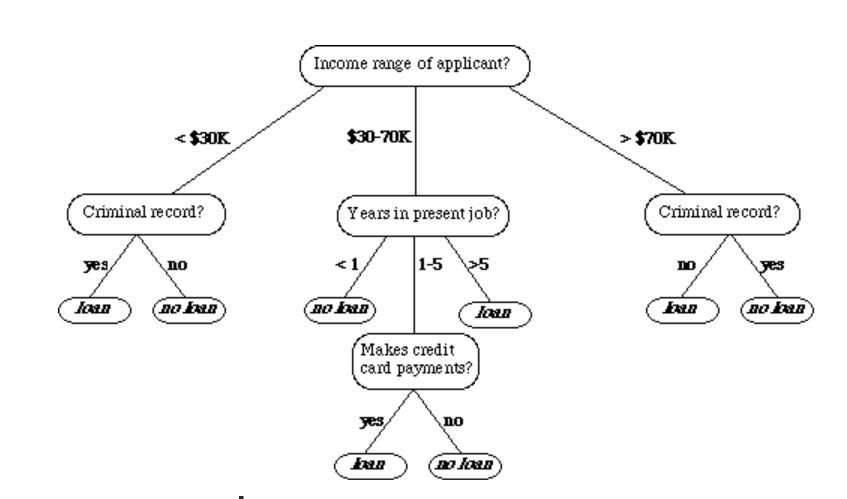

Here we can see the logic how it is making the decision.

It’s simple and clear.

# So what is the decision tree??

A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value).


The whole idea is to create a tree like this for the entire data and process a single outcome at every leaf(or minimize the error in every leaf).

# Okay so how to build this??

There are couple of algorithms there to build a decision tree , we only talk about a few which are

1.CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.

2.ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics.

Lets just first build decision tree for classification problem using above algorithms,

# Classification with using the ID3 algorithm.

Let’s just take a famous dataset in the machine learning world which is whether dataset(playing game Y or N based on whether condition).

We have four X values (outlook,temp,humidity and windy) being categorical and one y value (play Y or N) also being categorical.

so we need to learn the mapping (what machine learning always does) between X and y.

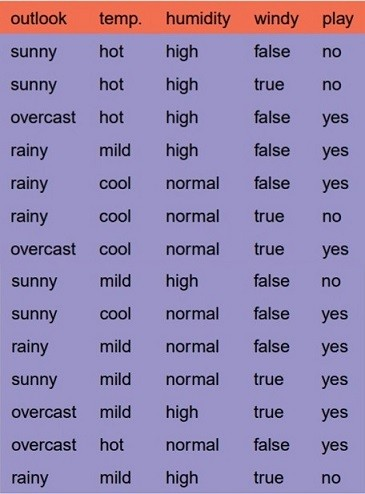

In [ ]:
This is a binary classification problem, lets build the tree using the ID3 algorithm

To create a tree, we need to have a root node first and we know that nodes are features/attributes(outlook,temp,humidity and windy),

<b>so which one do we need to pick first??</b>


Answer: determine the attribute that best classifies the training data; use this attribute at the root of the tree. Repeat this process at for each branch.

This means we are performing top-down, greedy search through the space of possible decision trees.

okay so how do we choose the best attribute?

Answer: use the attribute with the highest information gain in ID3

In order to define information gain precisely, we begin by defining a measure commonly used in information theory, called entropy that characterizes the (im)purity of an arbitrary collection of examples.”

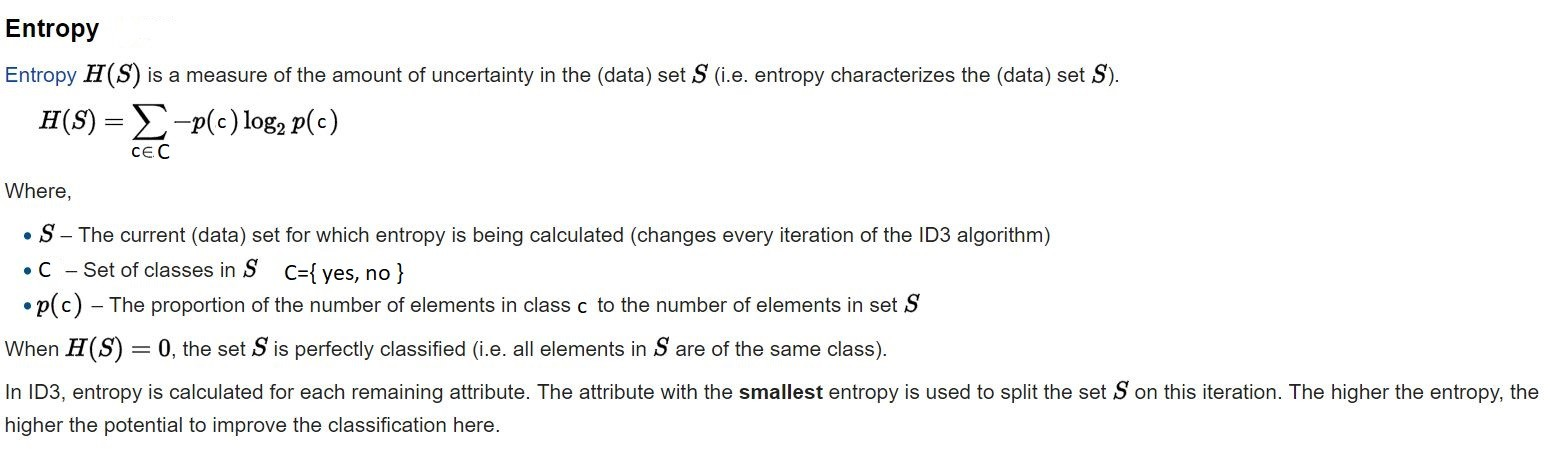

For a binary classification problem

1.If all examples are positive or all are negative then entropy will be zero i.e, low.


2.If half of the examples are of positive class and half are of negative class then entropy is one i.e, high.

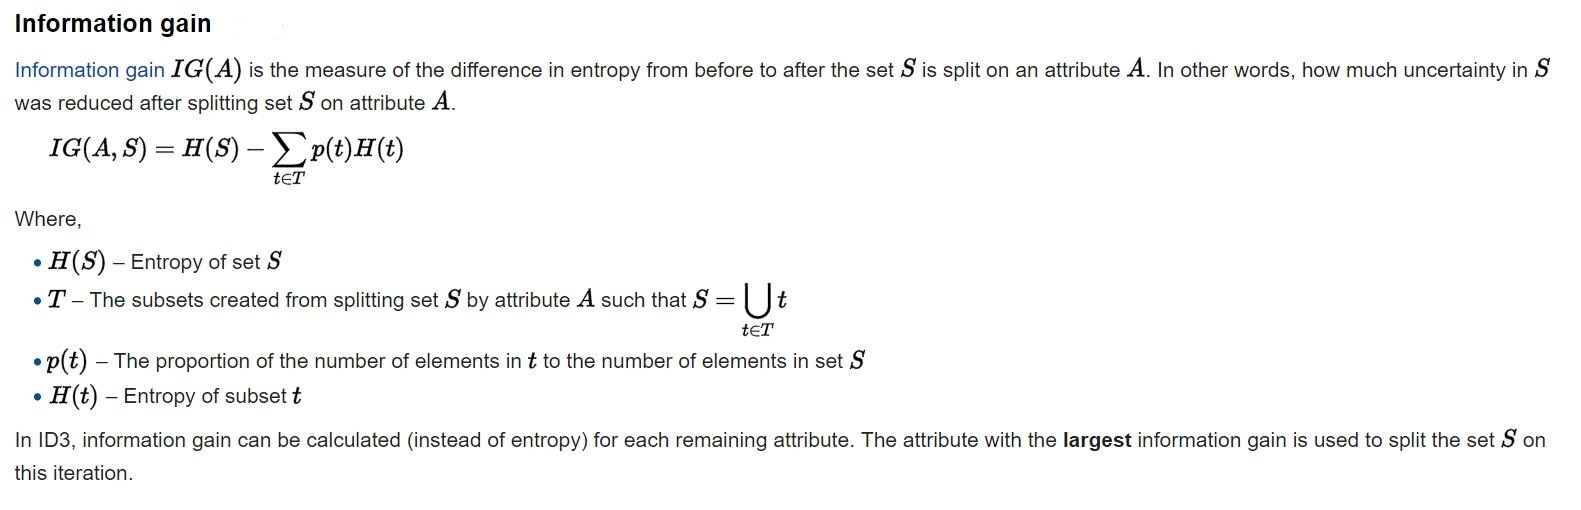

Okay lets apply these metrics to our dataset to split the data(getting the root node)

Steps

What the heck???

Okay I got it , if it does not make sense to you , let me make it sense to you.

Compute the entropy for the weather data set:

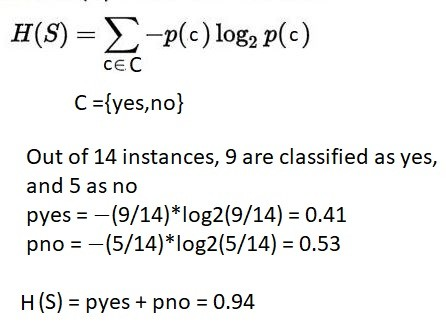

For every feature calculate the entropy and information gain

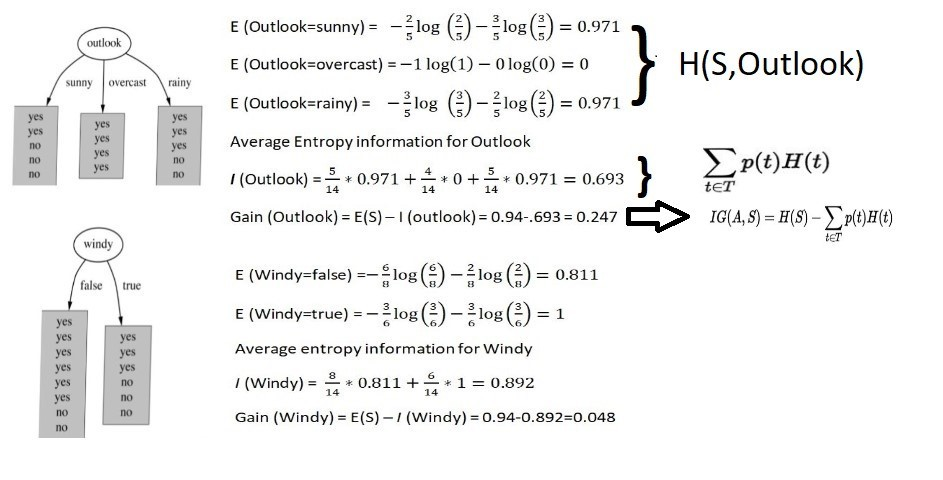

Similarity we can calculate for other two attributes(Humidity and Temp).

Pick the highest gain attribute.

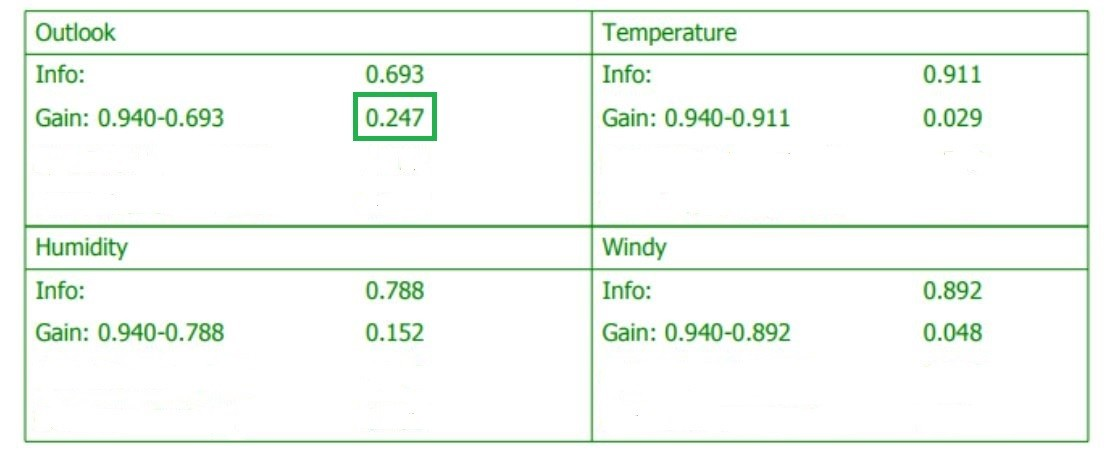

So our root node is Outlook.

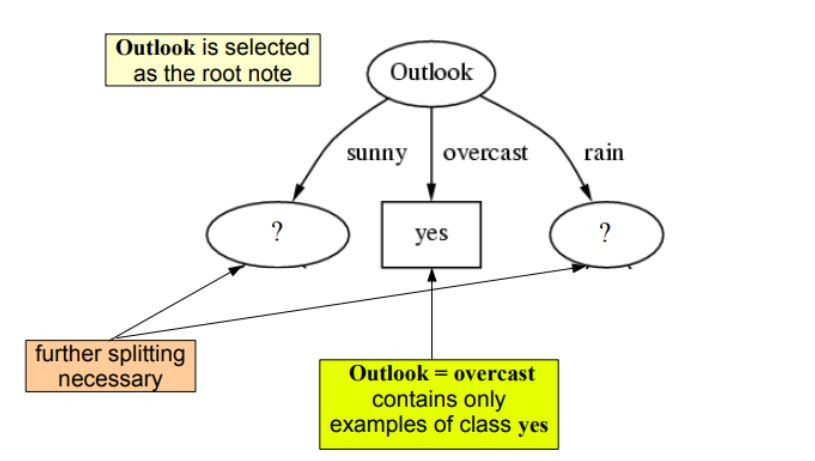

Repeat the same thing for sub-trees till we get the tree.

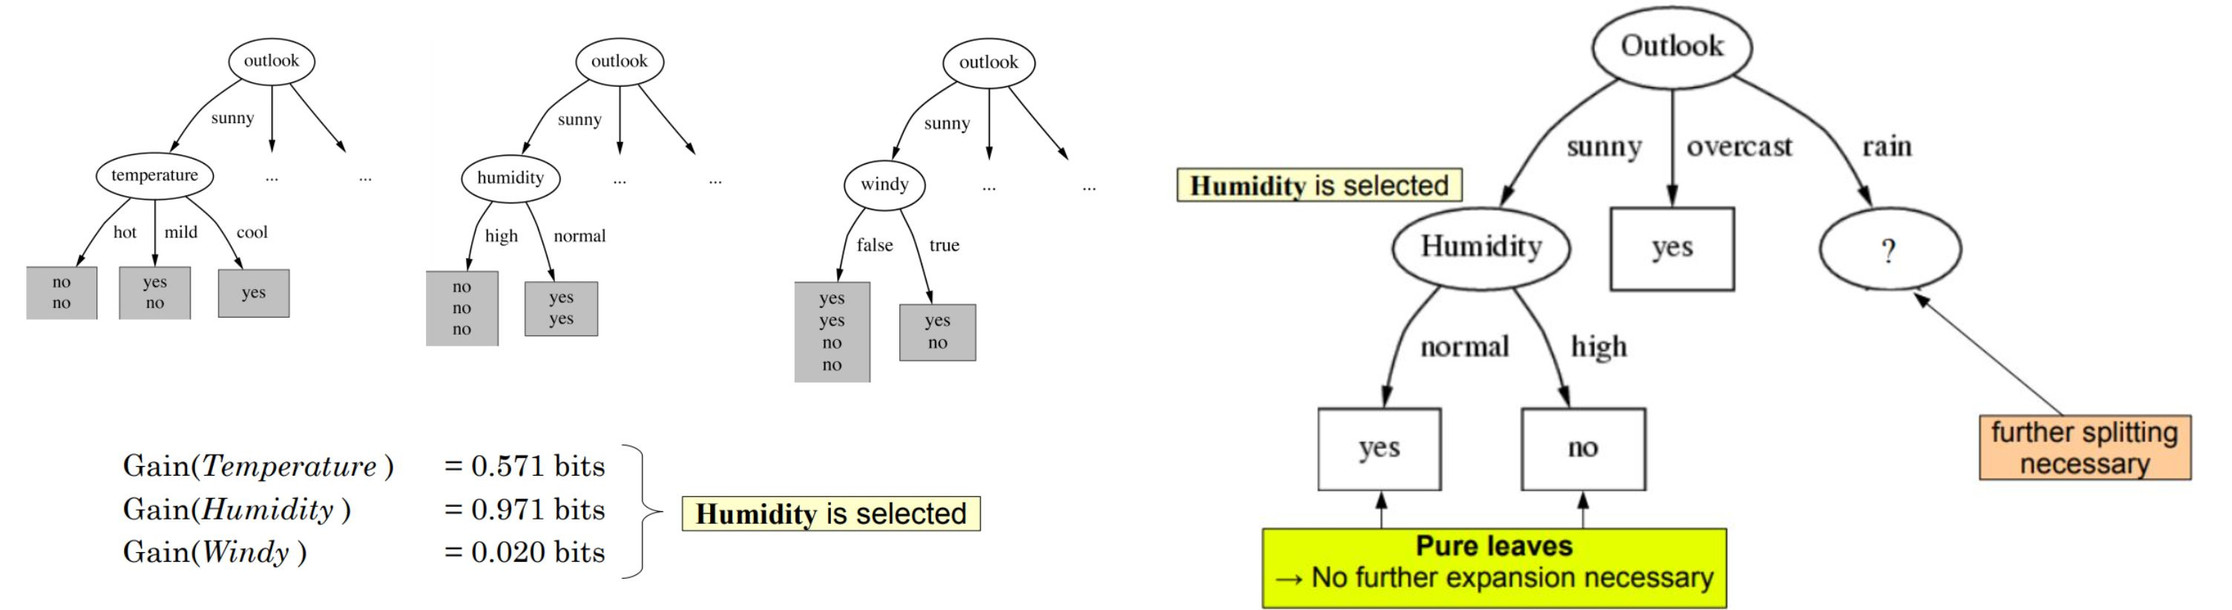

Finally we get the tree something like his.


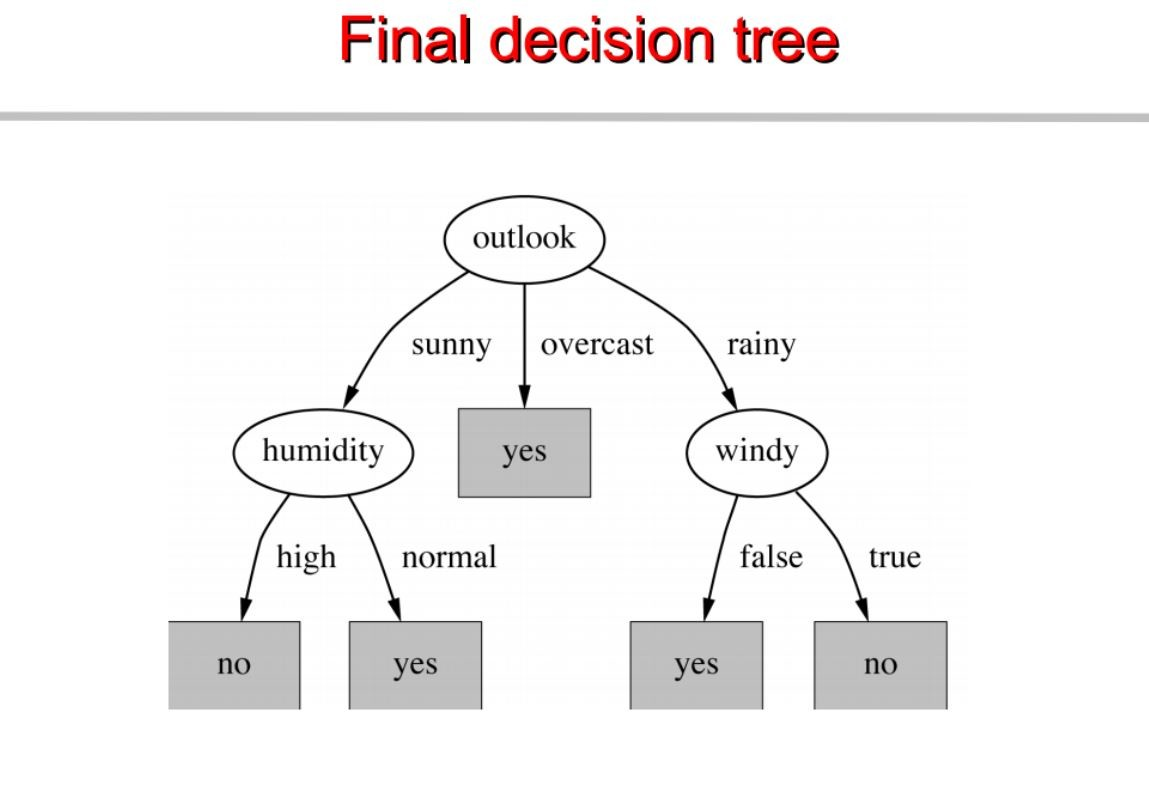

# Classification with using the CART algorithm.

In CART we use Gini index as a metric,

We use the Gini Index as our cost function used to evaluate splits in the dataset.

our target variable is Binary variable which means it take two values (Yes and No). There can be 4 combinations.

Gini Index for Binary Target variable is

= 1 — P^2(Target=0) — P^2(Target=1)


A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes.

We calculate it for every row and split the data accordingly in our binary tree. We repeat this process recursively.

For Binary Target variable, Max Gini Index value

= 1 — (1/2)^2 — (1/2)^2

= 1–2*(1/2)^2

= 1- 2*(1/4)

= 1–0.5

= 0.5

Similarly if Target Variable is categorical variable with multiple levels, the Gini Index will be still similar. If Target variable takes k different values, the Gini Index will be


Maximum value of Gini Index could be when all target values are equally distributed.

Similarly for Nominal variable with k level, the maximum value Gini Index is

= 1–1/k

Minimum value of Gini Index will be 0 when all observations belong to one label.

Steps:

The calculations are similar to ID3 ,except the formula changes.

for example :compute gini index for dataset

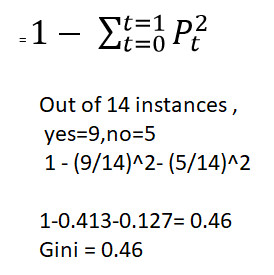

similarly we can follow other steps to build the tree

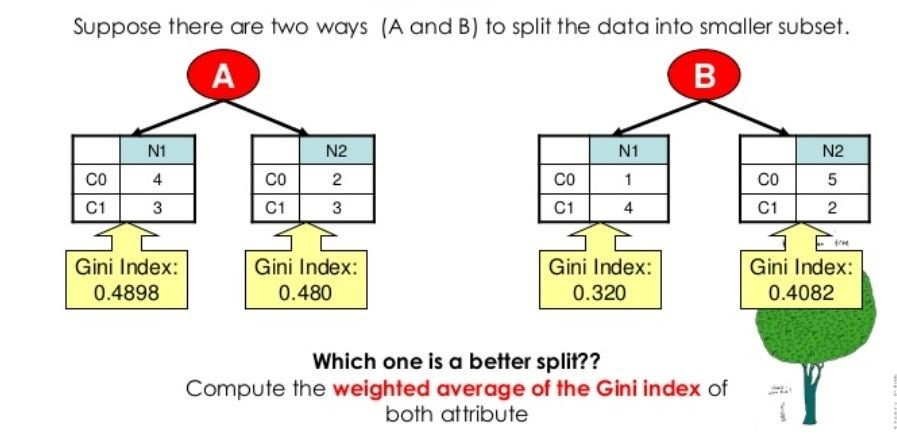

# Let's Code : Example 1

# Classifiers

Imagine writing a program that has to predict if a picture contains a male or female. You would have to write tons of programming rules. If I’d give you another group of two images, you’d have to create new programming rules all over again. Machine Learning is a better way to solve these problems.

Instead of programatically defining each rule, we use an algorithm that creates the rules for us. This type of algorithm is named a classifier. It takes data as input and shows a label as output.

A practical example of this would be, given an image of a person, the classifier would predict if it’s female or male.

The classifier has these steps:

In this example we’ll use simple arrays as data. 

In [3]:
#We import tree from sklearn and create the model
from sklearn import tree
clf = tree.DecisionTreeClassifier()  

#Then we create the training data for the classifier / decision tree:

#[height, hair-length, voice-pitch]                                             
X = [ [180, 15,0],                                                              
      [167, 42,1],                                                              
      [136, 35,1],                                                              
      [174, 15,0],                                                              
      [141, 28,1]]                                                              

Y = ['man', 'woman', 'woman', 'man', 'woman']

Y = ['man', 'woman', 'woman', 'man', 'woman']                                   

clf = clf.fit(X, Y)                                                             
prediction = clf.predict([[133, 37,1]])                                         
print(prediction)    

['woman']


# Example : 2

Dataset Used: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
        
Check this link for details      

In [5]:
#importing libraries 

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#reading the dataset
dataset = pd.read_csv("bill_authentication.csv")  

In [6]:
dataset.shape  

(1372, 5)

In [7]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Preparing the Data

we will divide our data into attributes and labels and will then divide the resultant data into both training and test sets. By doing this we can train our algorithm on one set of data and then test it out on a completely different set of data that the algorithm hasn't seen yet. This provides you with a more accurate view of how your trained algorithm will actually perform.

To divide data into attributes and labels

In [8]:
X = dataset.drop('Class', axis=1)  
y = dataset['Class'] 

Here the X variable contains all the columns from the dataset, except the "Class" column, which is the label. The y variable contains the values from the "Class" column. The X variable is our attribute set and y variable contains corresponding labels.

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In the code above, the test_size parameter specifies the ratio of the test set, which we use to split up 20% of the data in to the test set and 80% for training

In [11]:
#Training and Making Predictions'

from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  



# Evaluating the Algorithm

At this point we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. Lucky for us Scikit=-Learn's metrics library contains the classification_report and confusion_matrix methods that can be used to calculate these metrics for us:

In [12]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[153   0]
 [  3 119]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99       153
          1       1.00      0.98      0.99       122

avg / total       0.99      0.99      0.99       275



From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 4. This is 98.5 % accuracy. Not too bad!

# Hyperparameters

In [ ]:
# max_depth :
# how deep the tree can be. The deeper the tree,
# the more splits it has and it captures more information about the data. 
# We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

In [ ]:
# min_samples_split:
# represents the minimum number of samples required to split an internal node. 
# This can vary between considering at least one sample at each node to considering all of the samples at each node. 
# When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node.
# Here we will vary the parameter from 10% to 100% of the samples

# We can clearly see that when we consider 100% of the samples at each node, the model cannot learn enough about the data. 
# This is an underfitting case.